## Importing Necessary Libraries

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Data Collection and Exploration

In [2]:
#Loading the dataset from csv file to a Pandas Dataframe
df=pd.read_csv('Train.csv')

In [3]:
#First Five rows of dataset
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7098.000000,8569.000000,8569.000000,8569.000000,8569.000000
mean,12.854295,0.066171,141.058834,1997.828685,2182.694183
std,4.641626,0.051649,62.287675,8.370565,1707.119928
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.770000,0.026980,93.846200,1987.000000,834.913200
50%,12.600000,0.053939,143.078600,1999.000000,1794.331000
75%,16.850000,0.094697,185.758200,2004.000000,3103.959600
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
#number of data points and features
df.shape
df.size

102828

The big_mart_dataset has 8523 data points and  12 featues. 

In [6]:
#getting information regarding the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8569 entries, 0 to 8568
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8569 non-null   object 
 1   Item_Weight                7098 non-null   float64
 2   Item_Fat_Content           8569 non-null   object 
 3   Item_Visibility            8569 non-null   float64
 4   Item_Type                  8569 non-null   object 
 5   Item_MRP                   8569 non-null   float64
 6   Outlet_Identifier          8569 non-null   object 
 7   Outlet_Establishment_Year  8569 non-null   int64  
 8   Outlet_Size                6145 non-null   object 
 9   Outlet_Location_Type       8569 non-null   object 
 10  Outlet_Type                8569 non-null   object 
 11  Item_Outlet_Sales          8569 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 803.5+ KB


big_mart_data has null values in Item_Weight column and Outlet_Size column. The dataset has 4 features with data type float 7 features with data type string and 1 with data type integer which is Outlet_Establishment_Year. 

# Big Mart Data Features

## Categorical Features
- **Item_Identifier**: Identifier for the item
- **Item_Fat_Content**: Fat content of the item (e.g., Low Fat, Regular)
- **Item_Type**: Type of item (e.g., Dairy, Snacks)
- **Outlet_Identifier**: Identifier for the outlet
- **Outlet_Size**: Size of the outlet (e.g., Small, Medium, Large)
- **Outlet_Location_Type**: Location type of the outlet (e.g., Tier 1, Tier 2, Tier 3)
- **Outlet_Type**: Type of outlet (e.g., Grocery Store, Supermarket Type1)

## Numerical Features
- **Item_Weight**: Weight of the item (float64)
- **Item_Visibility**: Visibility of the item (float64)
- **Item_MRP**: Maximum Retail Price of the item (float64)
- **Outlet_Establishment_Year**: Year the outlet was established (int64)

In [7]:
# Summary statistics for categorical variables
df.describe(include='object').T

,count,unique,top,freq
Item_Identifier,8569,1559,FDW13,10
Item_Fat_Content,8569,5,Low Fat,5118
Item_Type,8569,16,Fruits and Vegetables,1235
Outlet_Identifier,8569,10,OUT027,939
Outlet_Size,6145,3,Medium,2806
Outlet_Location_Type,8569,3,Tier 3,3366
Outlet_Type,8569,4,Supermarket Type1,5608


In [8]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

# Handling Missing Values

Item_Identifier                 0
Item_Weight                  1471
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2424
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


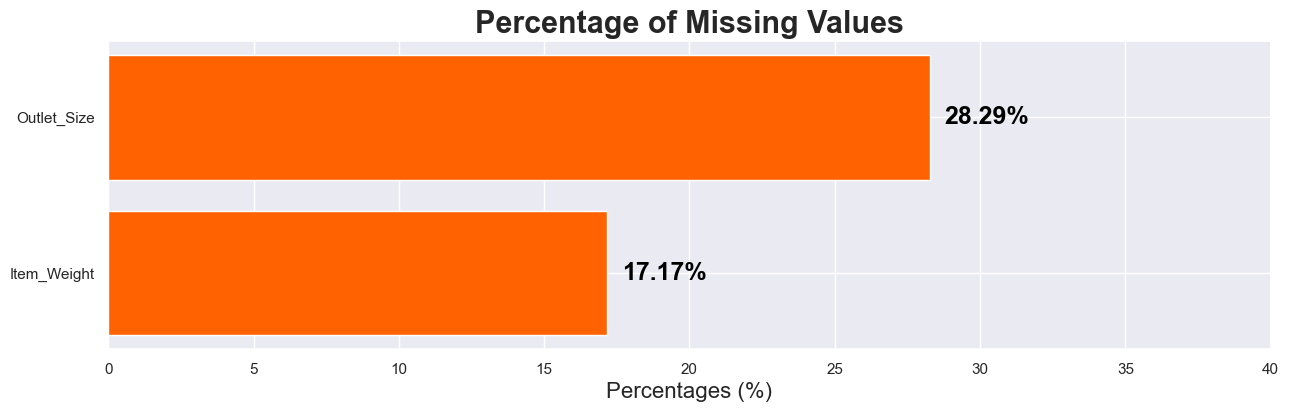

In [9]:
# Calculating the percentage of missing values for each column
missing_data = df.isnull().sum()
print(missing_data)
missing_percentage = (missing_data[missing_data > 0] / df.shape[0]) * 100

# Prepare values
missing_percentage.sort_values(ascending=True, inplace=True)

# Plot the barh chart
fig, ax = plt.subplots(figsize=(15, 4))
ax.barh(missing_percentage.index, missing_percentage, color='#ff6200')

# Annotate the values and indexes
for i, (value, name) in enumerate(zip(missing_percentage, missing_percentage.index)):
    ax.text(value+0.5, i, f"{value:.2f}%", ha='left', va='center', fontweight='bold', fontsize=18, color='black')

# In this loop:

    # enumerate() adds a counter to an iterable. In your case, it will add a counter i.
    # zip() combines two iterables, missing_percentage and missing_percentage.index, element-wise. So, it pairs the values from missing_percentage with their corresponding index names.
    # (value, name) unpacks each pair of values and names obtained from zip().    
    
# Set x-axis limit
ax.set_xlim([0, 40])

# Add title and xlabel
plt.title("Percentage of Missing Values", fontweight='bold', fontsize=22)
plt.xlabel('Percentages (%)', fontsize=16)
plt.show()

Outlet_Size (28.28% missing values)
     The CustomerID column containsjust abovey a quarter of missing datm. Imputing such a large percentage of missing values might introduce significant bias or noise into the analysis. 

In [10]:
# Create a DataFrame 'df_item_weight_not_null' containing only rows where 'Item_Weight' is not null
# Select only the 'Item_Identifier' and 'Item_Weight' columns
# Remove any duplicate rows to ensure each 'Item_Identifier' is unique
df_item_weight_not_null=df[df['Item_Weight'].notnull()][['Item_Identifier','Item_Weight']].drop_duplicates()

In [11]:
# Merging 'df' with 'df_item_weight_not_null' based on 'Item_Identifier'
# The merge is performed with a 'left' join, meaning all rows from 'df' will be retained
# 'df_item_weight_not_null' contributes only 'Item_Identifier' and 'Item_Weight' columns to the merge
# The suffix '_lookup' is added to the 'Item_Weight' column from 'df_item_weight_not_null' to differentiate it from the existing 'Item_Weight' column in 'df'
df_merged_item = pd.merge(df, df_item_weight_not_null[['Item_Identifier', 'Item_Weight']], 
                     on='Item_Identifier', 
                     suffixes=('', '_lookup'), 
                     how='left')

# Filling missing values in 'Item_Weight' with the corresponding values from 'Item_Weight_lookup'
# This means if 'Item_Weight' in 'df' is NaN, it will be replaced with 'Item_Weight_lookup' from 'df_item_weight_not_null'
df['Item_Weight'] = df['Item_Weight'].fillna(df_merged_item['Item_Weight_lookup'])


In [12]:
# Group the DataFrame by 'Outlet_Identifier'
# For each unique 'Outlet_Identifier', calculate the sum of 'Item_Outlet_Sales'
outlet_size=df[['Outlet_Identifier','Item_Outlet_Sales']].groupby('Outlet_Identifier').sum().round(2)

In [13]:
outlet_size

,Item_Outlet_Sales
Outlet_Identifier,
OUT010,188882.80
OUT013,2147448.68
OUT017,2179274.59
OUT018,1874338.85
OUT019,182157.55
OUT027,3459522.77
OUT035,2272988.60
OUT045,2061479.92
OUT046,2143330.71


In [14]:
# Filter rows where 'Outlet_Size' is NaN
# Select the 'Outlet_Identifier' column from these filtered rows
# Find the unique values of 'Outlet_Identifier' for rows where 'Outlet_Size' is missing
df[df['Outlet_Size'].isnull()]['Outlet_Identifier'].unique()

array(['OUT010', 'OUT045', 'OUT017'], dtype=object)

Since, only 3 Outlet_Identifier ['OUT010', 'OUT045', 'OUT017'] for which values for Outlet_Size are missing. Values on outlet size is filled based on total sales for each Outlet_Identifier. Since outlet OUT010 has sales of 188340.17 which is considerabely low Outlet_Size has been assigned as 'Small'. Similarly for other two outlets sales is above of 2 million, it has been assigned as 'High'.

In [15]:
# For rows where 'Outlet_Identifier' is 'OUT010', fill missing values in 'Outlet_Size' with 'Small'
df.loc[df['Outlet_Identifier'] == 'OUT010', 'Outlet_Size'] = df.loc[df['Outlet_Identifier'] == 'OUT010', 'Outlet_Size'].fillna('Small')

# For rows where 'Outlet_Identifier' is 'OUT045', fill missing values in 'Outlet_Size' with 'High'
df.loc[df['Outlet_Identifier'] == 'OUT045', 'Outlet_Size'] = df.loc[df['Outlet_Identifier'] == 'OUT045', 'Outlet_Size'].fillna('High')

# For rows where 'Outlet_Identifier' is 'OUT017', fill missing values in 'Outlet_Size' with 'High'
df.loc[df['Outlet_Identifier'] == 'OUT017', 'Outlet_Size'] = df.loc[df['Outlet_Identifier'] == 'OUT017', 'Outlet_Size'].fillna('High')


In [16]:
#Checking updated null values in each feature
df.isnull().sum()

Item_Identifier              0
Item_Weight                  4
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Since, remaining null values for Item_Weight is only 4 which is considerably low and has impact on overall data, it is better to remove from the data set.

In [17]:
#Droped null values
df.dropna(inplace=True)

In [18]:
#Checking updated null values in each feature
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [19]:
#Checking df shape and size
print ('shape:',df.shape)
print ('size:',df.size)


shape: (8565, 12)
size: 102780


## Handling Duplicates

In [20]:
#Checking for duplicates

df.duplicated().sum()

46

There are 46 duplicates in the data which are required to be removed.

In [21]:
#Removing duplicated data
df.drop_duplicates(inplace=True)

In [22]:
#Checking for duplicates

df.duplicated().sum()

0

There are no duplicated data remaining.

In [23]:
#Checking df shape and size
print ('shape:',df.shape)
print ('size:',df.size)

shape: (8519, 12)
size: 102228


## Cleaning Item_Fat_Content Column
First, we will calculate the occurrence count of each unique Item_Fat_Content in the dataset. Then, we will plot the Item_Fat_Content. This visualization will give a clear view of the highest occurring descriptions in the dataset:


In [24]:
# Check unique values of categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print("Unique values in", col, ":", df[col].unique())

Unique values in Item_Identifier : ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
Unique values in Item_Fat_Content : ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Unique values in Item_Type : ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Unique values in Outlet_Identifier : ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Unique values in Outlet_Size : ['Medium' 'Small' 'High']
Unique values in Outlet_Location_Type : ['Tier 1' 'Tier 3' 'Tier 2']
Unique values in Outlet_Type : ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


#### Inferences on Item_Fat_Content:

The most frequent Item_Fat_Content is eLow fat item and Regular.tive items.

Intemost of tinglItem_Fat_Contentescriptiproperre i and in full formn uppercase, 
which might be a standardized format for entering product 
descriptions in the databas few has been entered as abbreviations and in lowercase.ase styles.

In [25]:
#Replacing lower case and abbrebreation to proper case to match other values.
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat','reg':'Regular'})

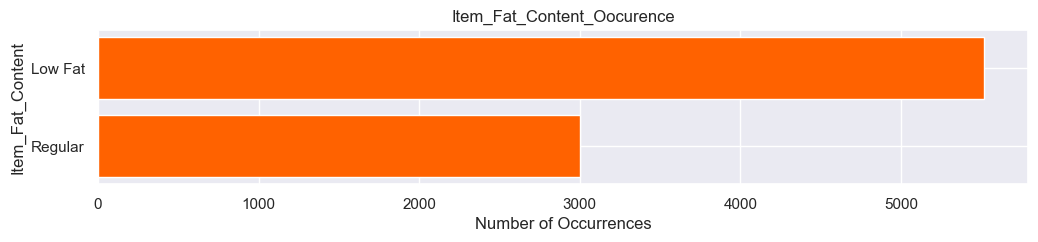

In [26]:
# Calculate the occurrence of each unique Item_Fat_Content
item_fat_content_counts = df['Item_Fat_Content'].value_counts()


# Plotting
plt.figure(figsize=(12,2))
plt.barh(item_fat_content_counts.index[::-1], item_fat_content_counts.values[::-1], color='#ff6200')

# Adding labels and title
plt.xlabel('Number of Occurrences')
plt.ylabel('Item_Fat_Content')
plt.title('Item_Fat_Content_Oocurence')

# Show the plot
plt.show()

In [27]:
# Resetting the index of the cleaned dataset
df.reset_index(drop=True, inplace=True)

In [28]:
# Getting the number of rows in the dataframe
df.shape[0]


8519

## Checking Outlier

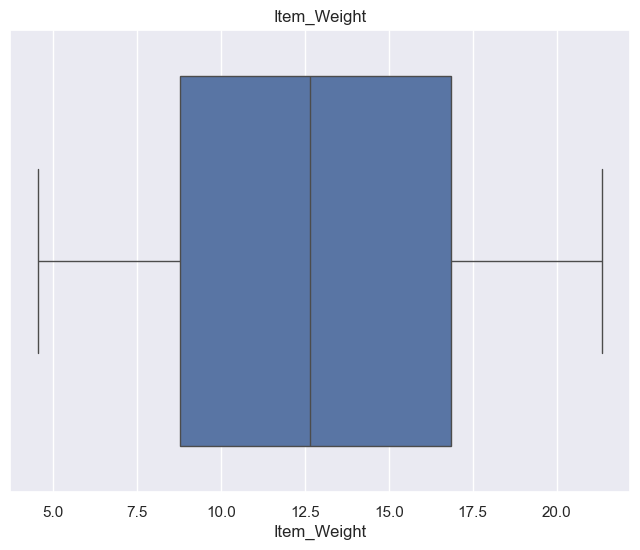

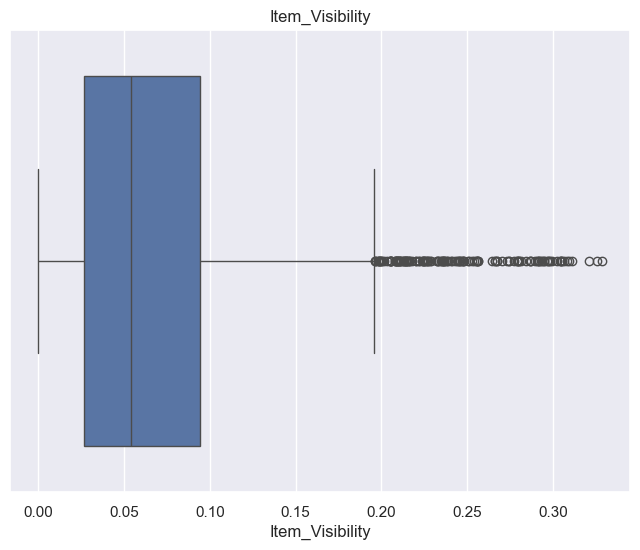

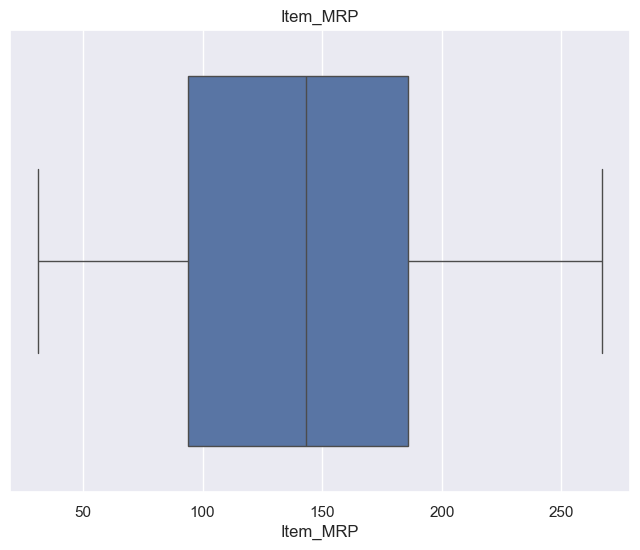

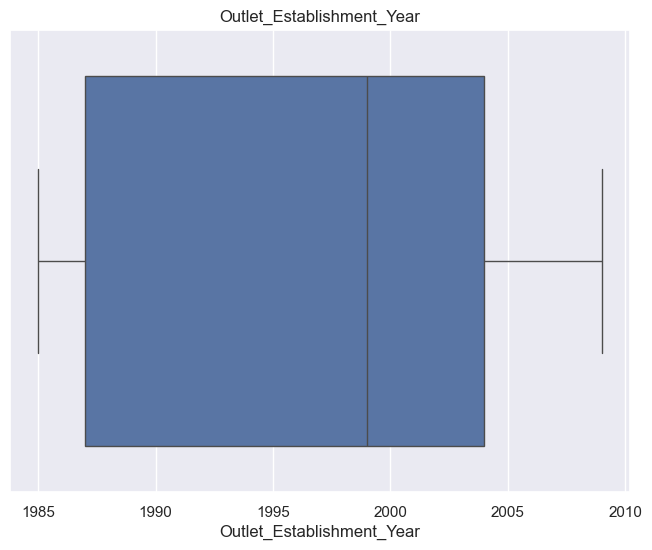

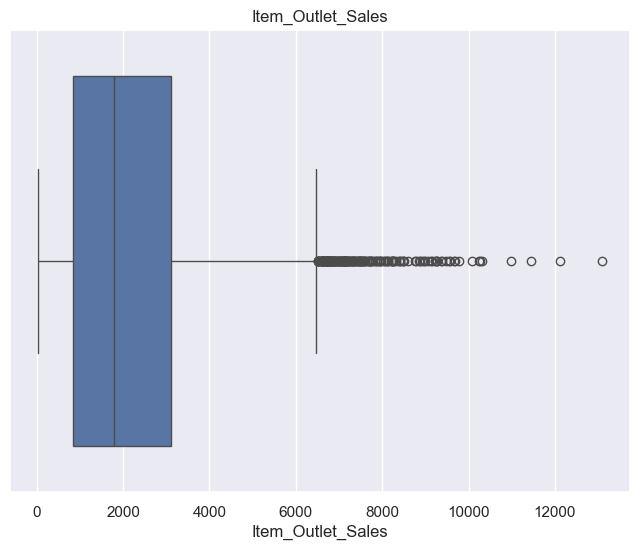

In [29]:
# Check for outliers in numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    # Use box plot to visualize outliers
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

In [30]:
#Checking item sales outlier
df[df['Item_Outlet_Sales']>10000]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1008,FDU14,17.75,Low Fat,0.034584,Dairy,248.3750,OUT027,1985,Medium,Tier 3,Supermarket Type3,10236.6750
1449,FDZ20,16.10,Low Fat,0.000000,Fruits and Vegetables,253.0356,OUT027,1985,Medium,Tier 3,Supermarket Type3,11445.1020
4346,FDP33,18.70,Low Fat,0.088840,Snack Foods,254.2672,OUT027,1985,Medium,Tier 3,Supermarket Type3,10993.6896
4885,FDF39,14.85,Regular,0.019495,Dairy,261.2910,OUT013,1987,High,Tier 3,Supermarket Type1,10256.6490
5219,FDQ19,7.35,Regular,0.014296,Fruits and Vegetables,242.6512,OUT027,1985,Medium,Tier 3,Supermarket Type3,12117.5600
6537,FDI50,8.42,Regular,0.030693,Canned,228.0352,OUT027,1985,Medium,Tier 3,Supermarket Type3,10306.5840
7184,NCE42,21.10,Low Fat,0.010551,Household,234.9958,OUT027,1985,Medium,Tier 3,Supermarket Type3,13086.9648
7187,NCH18,9.30,Low Fat,0.044445,Household,245.2802,OUT027,1985,Medium,Tier 3,Supermarket Type3,10072.8882


## Descriptive Analysis


Summary Statistics: Compute summary statistics such as mean, median, mode, standard deviation, minimum, and maximum values for numerical columns.

Summary Statistics:
        Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  8519.000000      8519.000000  8519.000000                8519.000000   
mean     12.875420         0.066112   141.010019                1997.837892   
std       4.646098         0.051586    62.283594                   8.369105   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.785000         0.026983    93.844900                1987.000000   
50%      12.650000         0.053925   143.047000                1999.000000   
75%      16.850000         0.094558   185.676600                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8519.000000  
mean         2181.188779  
std          1706.511093  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3100.630600  
max         13086.964800  


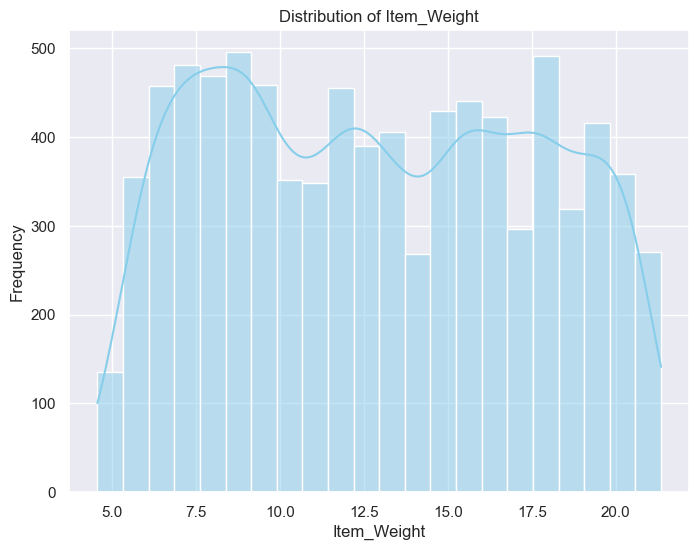

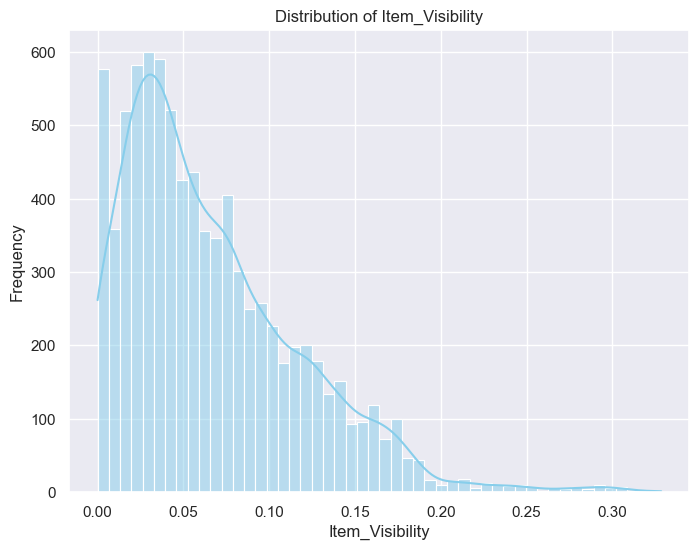

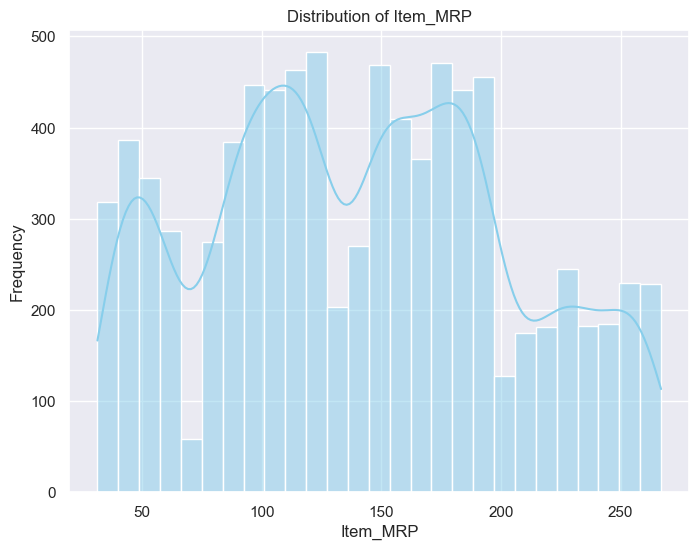

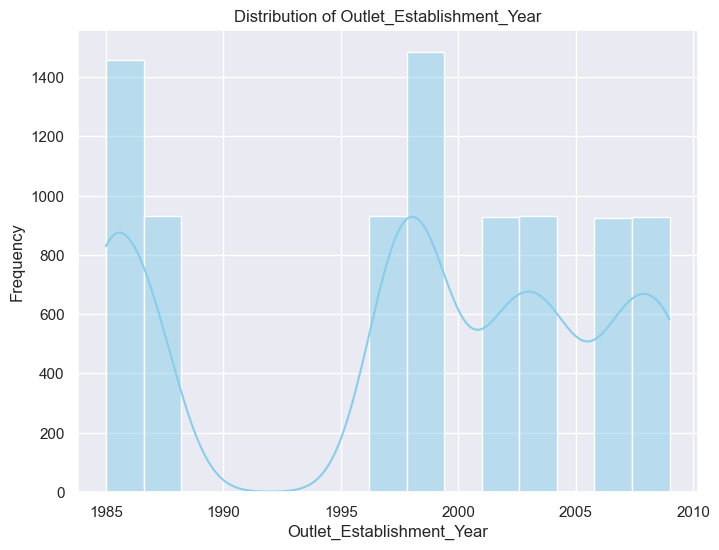

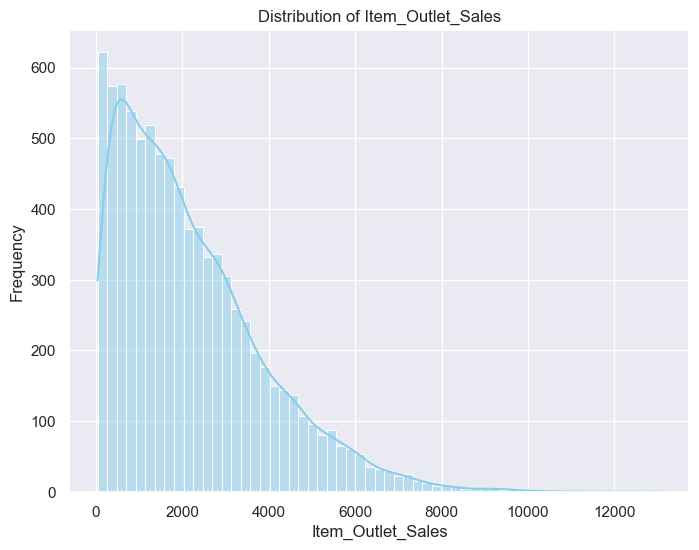

In [31]:

# Summary statistics
summary_stats = df.describe()
print("Summary Statistics:\n", summary_stats)

# Data distribution (histograms and density plots)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title('Distribution of ' + col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


Next, we can analyze categorical variables and examine the relationships between numerical variables using correlation analysis:

In [32]:
categorical_cols.shape

(7,)

## Exploratory Data Analytics

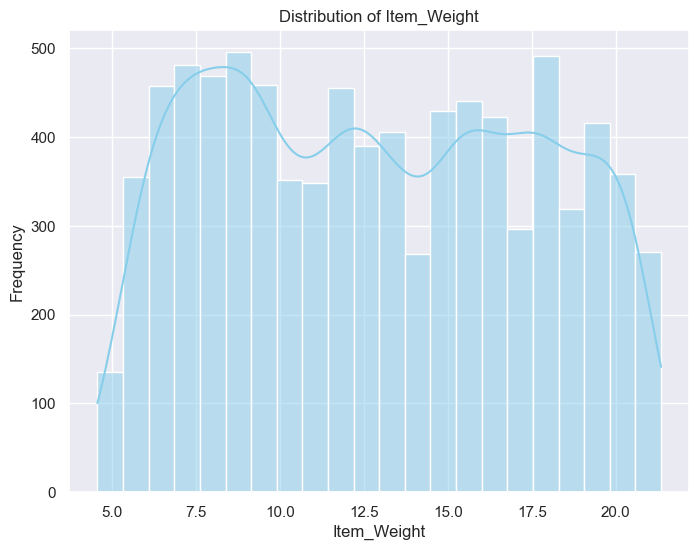

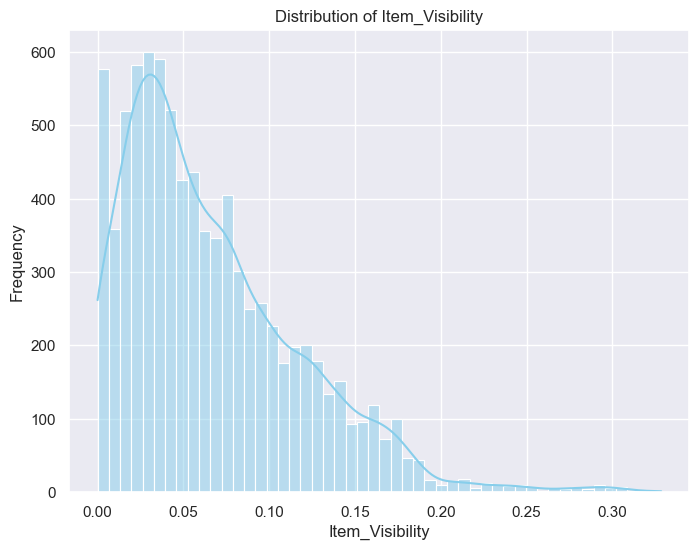

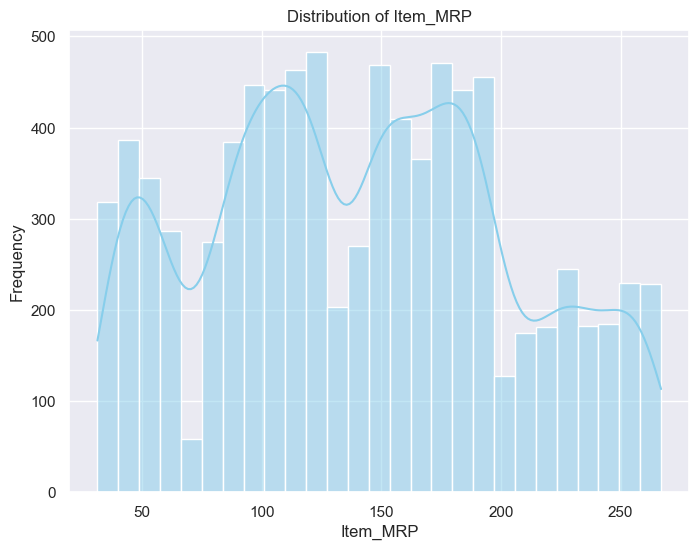

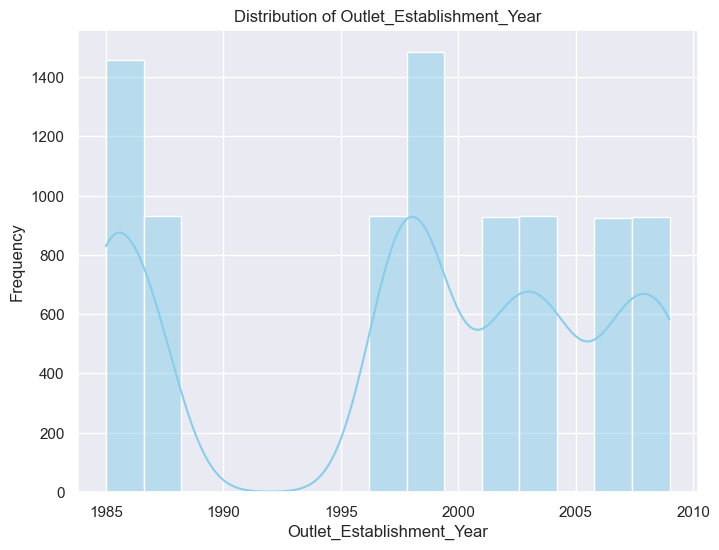

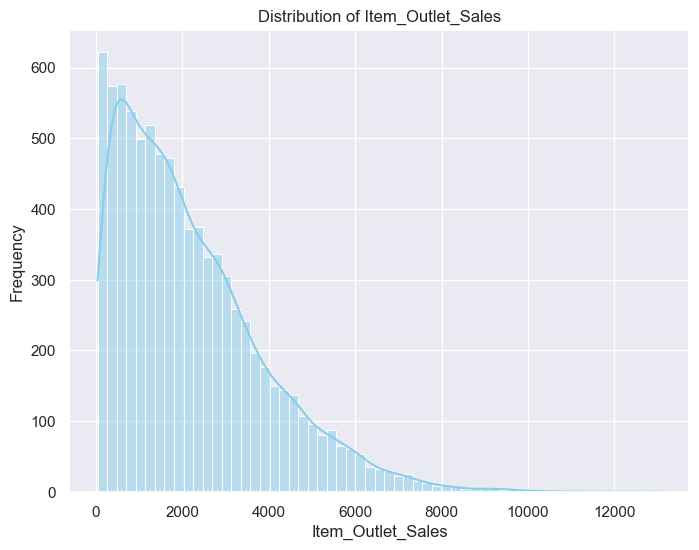

Summary Statistics:
        Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  8519.000000      8519.000000  8519.000000                8519.000000   
mean     12.875420         0.066112   141.010019                1997.837892   
std       4.646098         0.051586    62.283594                   8.369105   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.785000         0.026983    93.844900                1987.000000   
50%      12.650000         0.053925   143.047000                1999.000000   
75%      16.850000         0.094558   185.676600                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8519.000000  
mean         2181.188779  
std          1706.511093  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3100.630600  
max         13086.964800  


In [33]:
# Histograms for numerical variables
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title('Distribution of ' + col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Summary statistics
summary_stats = df[numerical_cols].describe()
print("Summary Statistics:\n", summary_stats)

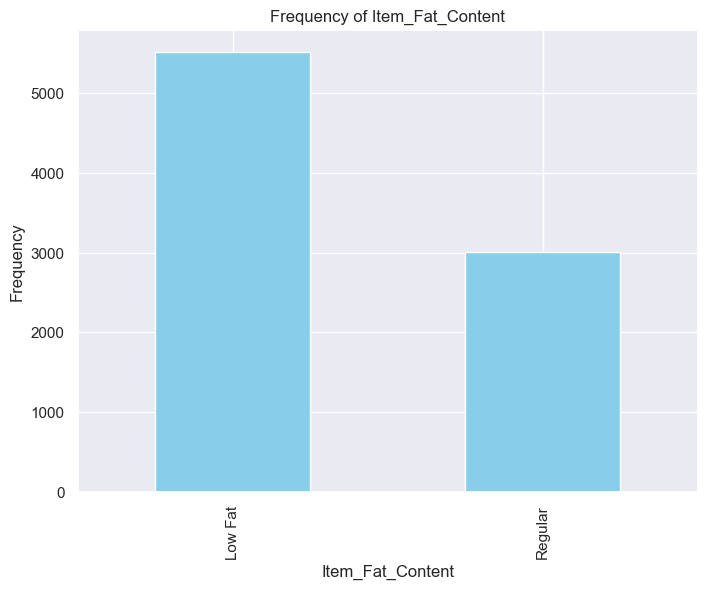

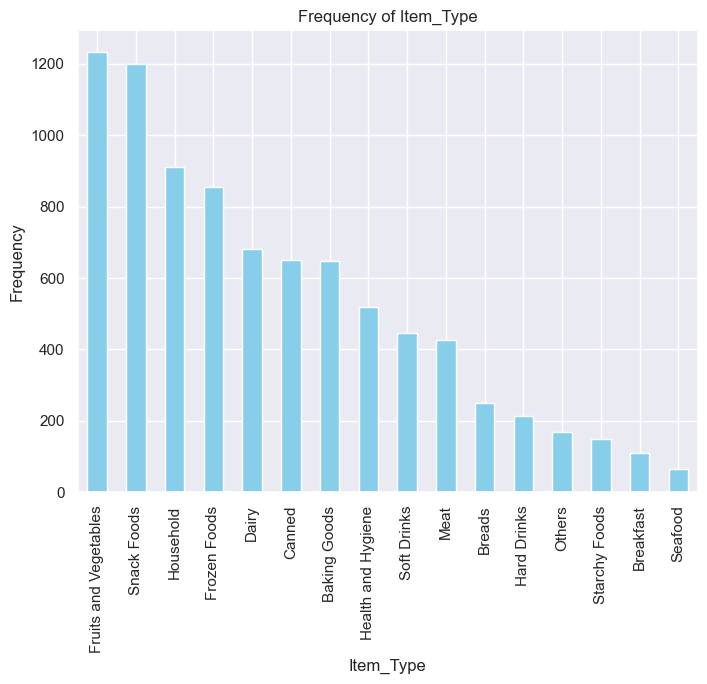

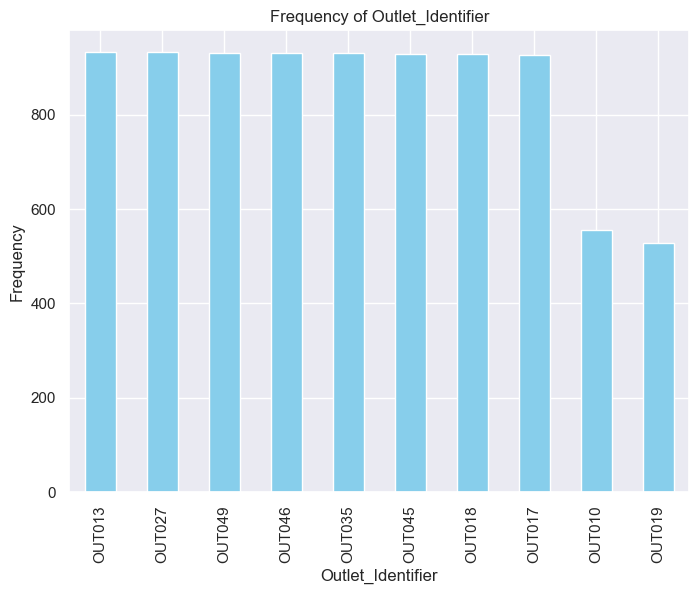

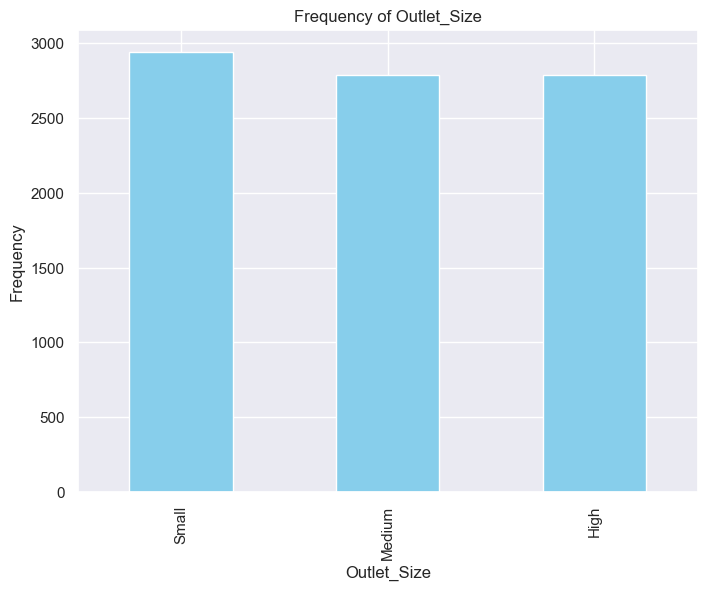

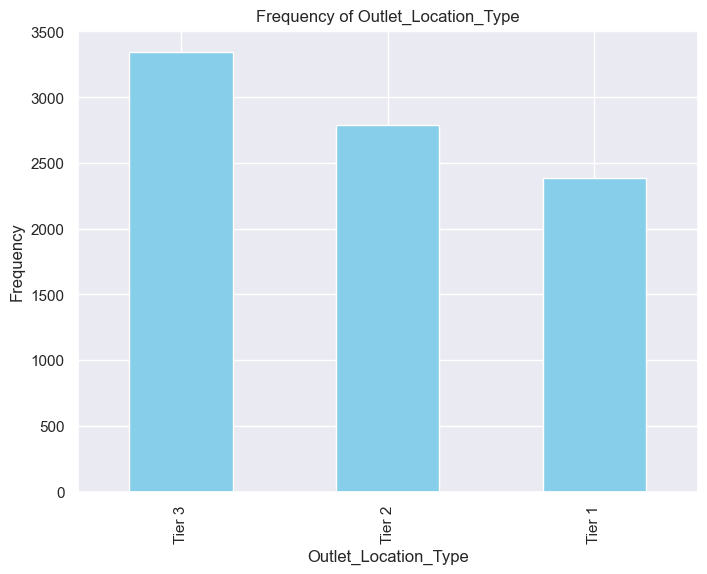

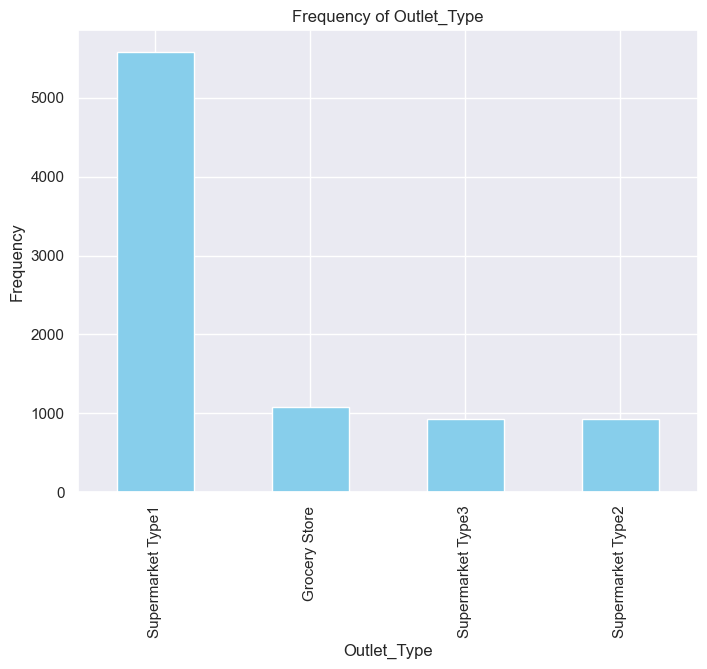

In [34]:
# Bar plots for categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols[1:]:
    plt.figure(figsize=(8, 6))
    df[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title('Frequency of ' + col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


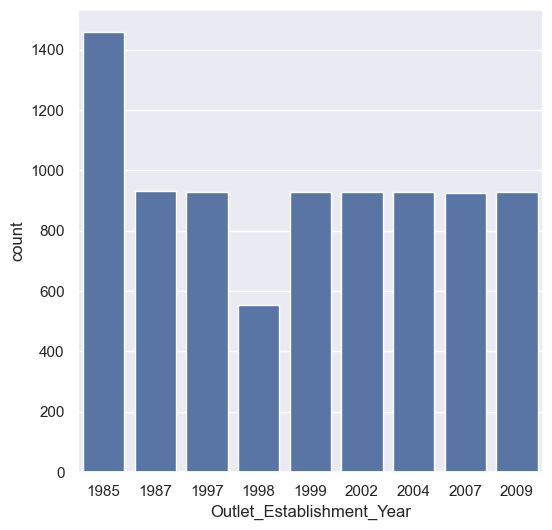

In [35]:
#Outlet_Establishment_Year
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year',data=df)
plt.show()

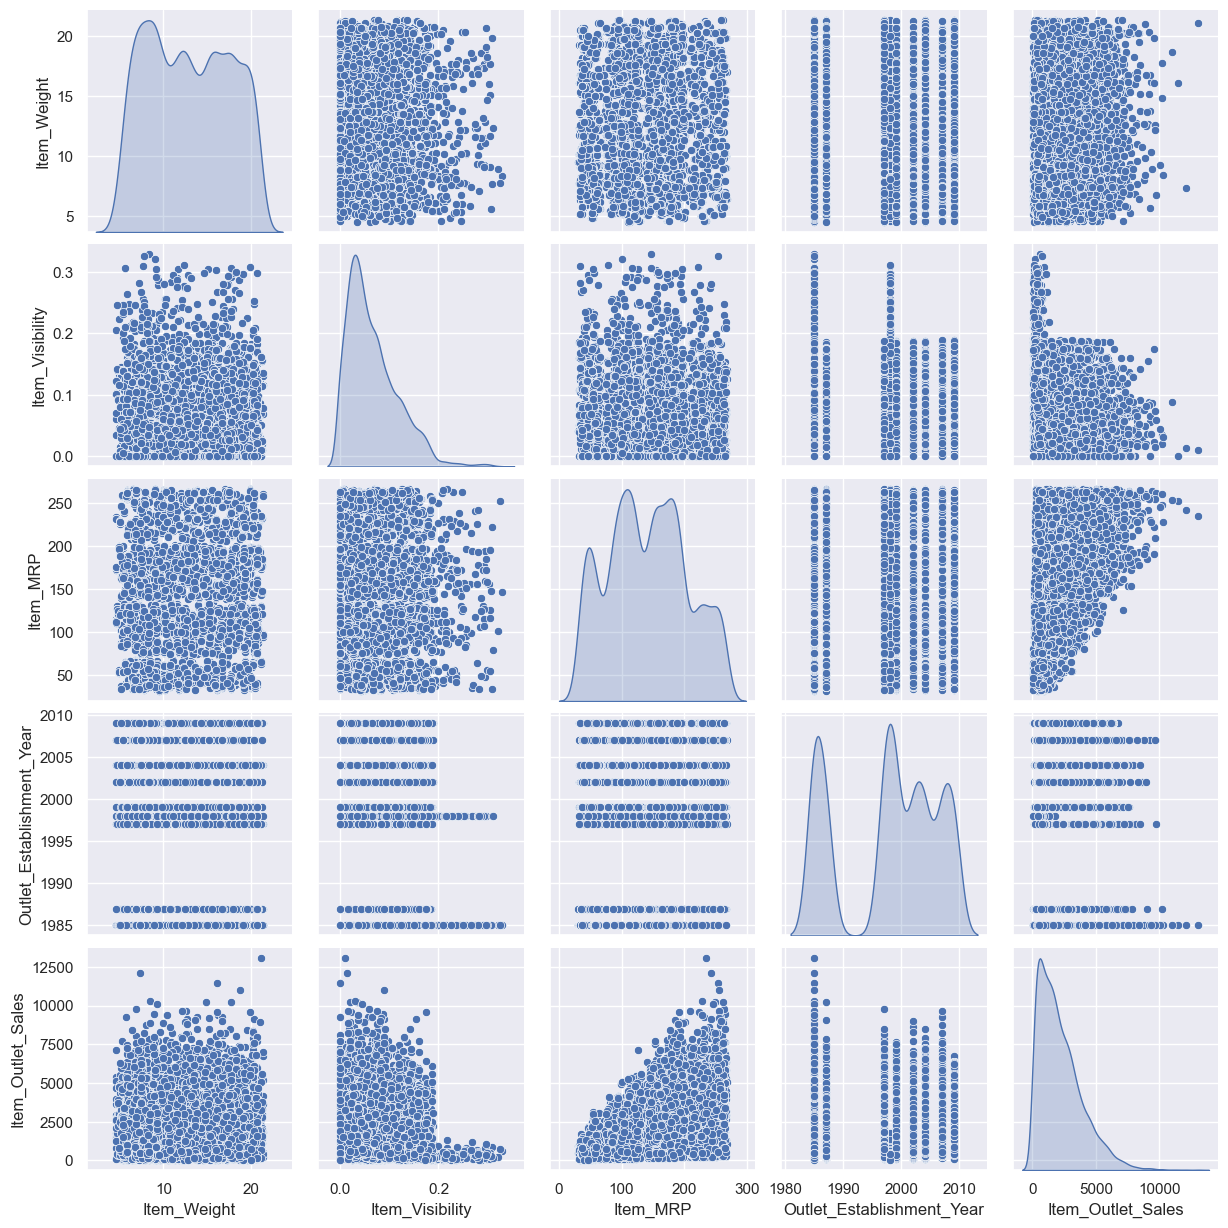

In [36]:
# Scatter plots for relationships between numerical variables
sns.pairplot(df[numerical_cols], diag_kind='kde')
plt.show()


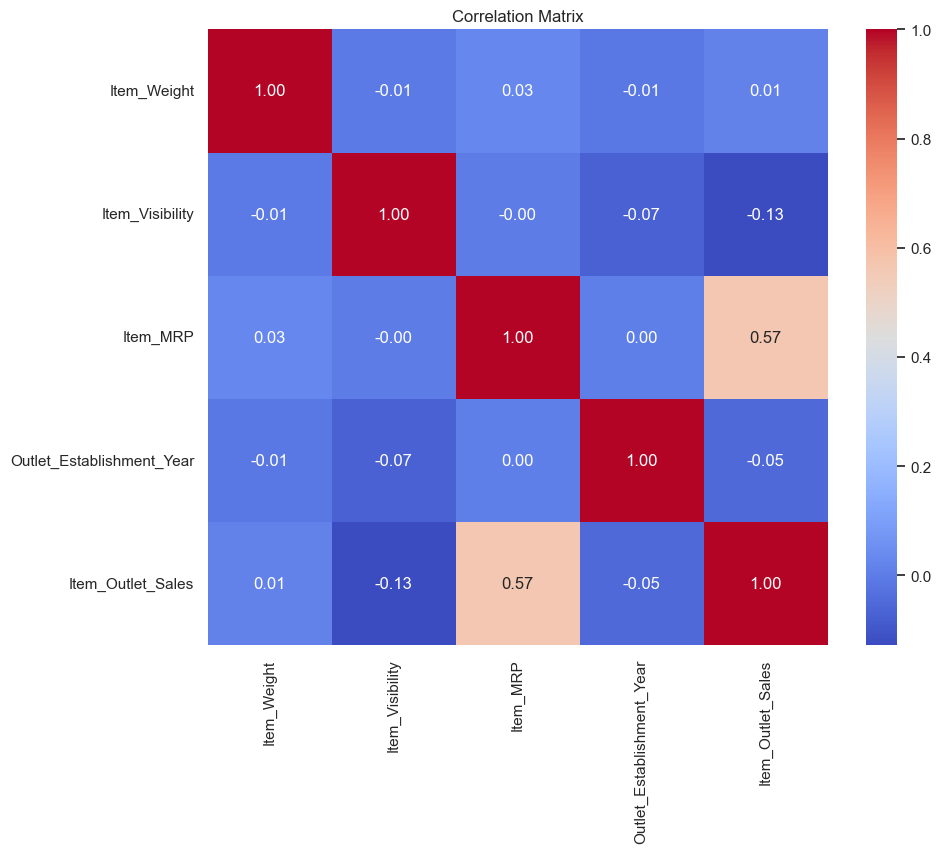

In [37]:
# Heatmap for correlation matrix
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## Feature Engineering

In [38]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder



In [39]:
#Displaying first five rows in dataframe
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [40]:
#Label Encoding
encoder = LabelEncoder()

In [41]:
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    df[col]=encoder.fit_transform(df[col])

In [42]:
# Normalize numerical features
scaler = StandardScaler()
df[['Item_Weight', 'Item_Visibility','Item_MRP']] = scaler.fit_transform(df[['Item_Weight', 'Item_Visibility','Item_MRP']])

In [43]:
#Displaying first five rows in dataframe
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,-0.769598,0,-0.970582,4,1.746938,9,1999,1,0,1,3735.1380
1,8,-1.497133,1,-0.907946,14,-1.489096,3,2009,1,2,2,443.4228
2,660,0.995427,0,-0.956764,10,0.009762,9,1999,1,0,1,2097.2700
3,1117,1.361347,1,-1.281681,6,0.659682,0,1998,2,2,0,732.3800
4,1293,-0.849240,0,-1.281681,9,-1.399305,1,1987,0,2,1,994.7052


### Outlier Detection

In [44]:
from sklearn.ensemble import IsolationForest
# Initializing the IsolationForest model with a contamination parameter of 0.05
is_model = IsolationForest(contamination=0.05, random_state=42)

# Fitting the model on our dataset (converting DataFrame to NumPy to avoid warning)
df['Outlier_Scores'] = is_model.fit_predict(df.iloc[:, 1:].to_numpy())

# Creating a new column to identify outliers (1 for inliers and -1 for outliers)
df['Is_Outlier'] = [1 if x == -1 else 0 for x in df['Outlier_Scores']]

# Display the first few rows of the customer_data dataframe
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlier_Scores,Is_Outlier
0,156,-0.769598,0,-0.970582,4,1.746938,9,1999,1,0,1,3735.1380,1,0
1,8,-1.497133,1,-0.907946,14,-1.489096,3,2009,1,2,2,443.4228,1,0
2,660,0.995427,0,-0.956764,10,0.009762,9,1999,1,0,1,2097.2700,1,0
3,1117,1.361347,1,-1.281681,6,0.659682,0,1998,2,2,0,732.3800,-1,1
4,1293,-0.849240,0,-1.281681,9,-1.399305,1,1987,0,2,1,994.7052,1,0


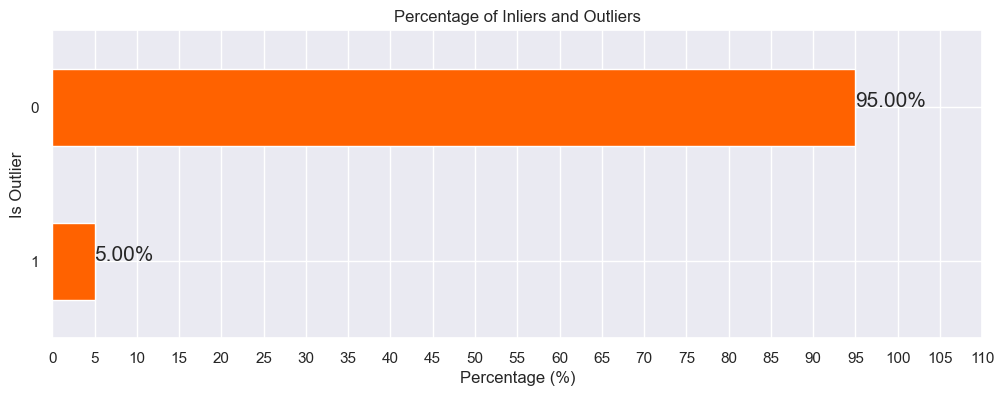

In [45]:
# Calculate the percentage of inliers and outliers
outlier_percentage = df['Is_Outlier'].value_counts(normalize=True) * 100

# Plotting the percentage of inliers and outliers
plt.figure(figsize=(12, 4))
outlier_percentage.plot(kind='barh', color='#ff6200')

# Adding the percentage labels on the bars
for index, value in enumerate(outlier_percentage):
    plt.text(value, index, f'{value:.2f}%', fontsize=15)

plt.title('Percentage of Inliers and Outliers')
plt.xticks(ticks=np.arange(0, 115, 5))
plt.xlabel('Percentage (%)')
plt.ylabel('Is Outlier')
plt.gca().invert_yaxis()
plt.show()

Since, 5 % outlier is not a big amount and has minimum impact on the result of, outliers are left as it is.

## Feature Selection

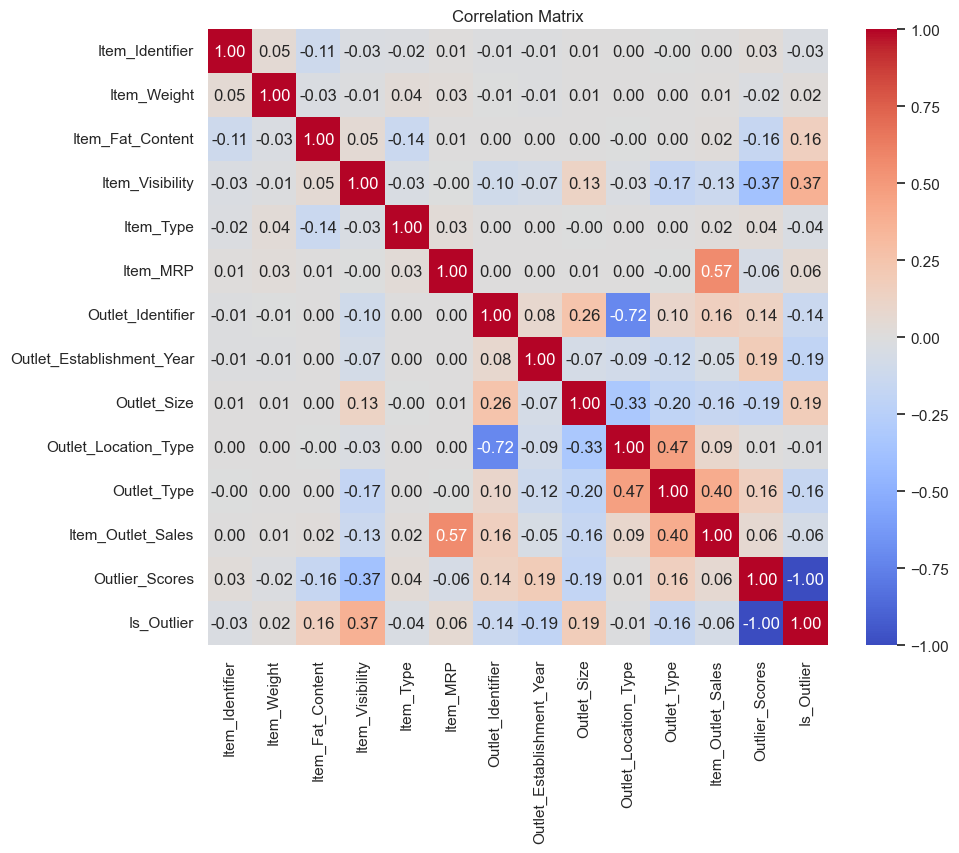

In [46]:
# Heatmap for correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [47]:
#features to be removed from the df. 
features_to_remove=['Outlet_Identifier','Outlet_Establishment_Year','Outlier_Scores','Is_Outlier']
df=df.drop(columns=features_to_remove,axis=1)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,-0.769598,0,-0.970582,4,1.746938,1,0,1,3735.1380
1,8,-1.497133,1,-0.907946,14,-1.489096,1,2,2,443.4228
2,660,0.995427,0,-0.956764,10,0.009762,1,0,1,2097.2700
3,1117,1.361347,1,-1.281681,6,0.659682,2,2,0,732.3800
4,1293,-0.849240,0,-1.281681,9,-1.399305,0,2,1,994.7052


- Since, outler_identifier and outlet size and type plays similar role in the dataset, Outlet_iedentifier has been removed also outlet identifier has high corelation with outlet location type.
- Similarly, outlet establishment year doesnot play significant role in the item outlet sales, hence it has also been removed.
- outlier scores and is outlier is removed as it was only added to determine outlier percentage.

## Spliting features and Target

In [48]:
X=df.drop(columns='Item_Outlet_Sales',axis=1)
y=df['Item_Outlet_Sales']

In [49]:
X.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,-0.769598,0,-0.970582,4,1.746938,1,0,1
1,8,-1.497133,1,-0.907946,14,-1.489096,1,2,2
2,660,0.995427,0,-0.956764,10,0.009762,1,0,1
3,1117,1.361347,1,-1.281681,6,0.659682,2,2,0
4,1293,-0.849240,0,-1.281681,9,-1.399305,0,2,1


In [50]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [51]:
#Spliting the data into training data and testing data
X_train,X_test, y_train, y_test=train_test_split(X, y, test_size=0.2,random_state=42)

In [52]:
print(X.shape,X_train.shape,X_test.shape)

(8519, 9) (6815, 9) (1704, 9)


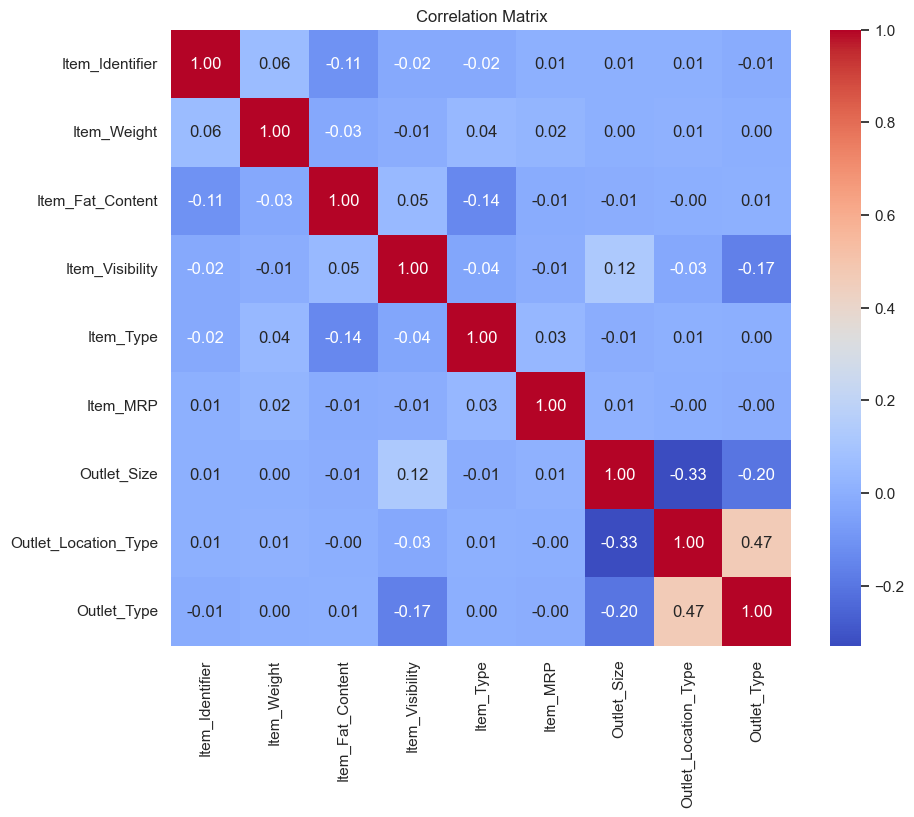

In [53]:
correlation_matrix = X_train.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## Machine Learning model training

## Linear Regression Model

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# predicting the  test set results
y_pred = model.predict(X_test)
print(y_pred)

# finding the mean squared error and variance
mse = mean_squared_error(y_test, y_pred)
print('RMSE :', np.sqrt(mse))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

[1672.32560732 1782.11241087 -240.41943088 ... 1507.22488595 1221.72577472
 2274.02263143]
RMSE : 1187.688606811322
Variance score: 0.53


Evaluation

In [56]:
from sklearn.model_selection import cross_val_score

# Cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_root_mean_squared_error')
print(f'Cross-Validation RMSE: {-cv_scores.mean()}')


Cross-Validation RMSE: 1192.326727375027


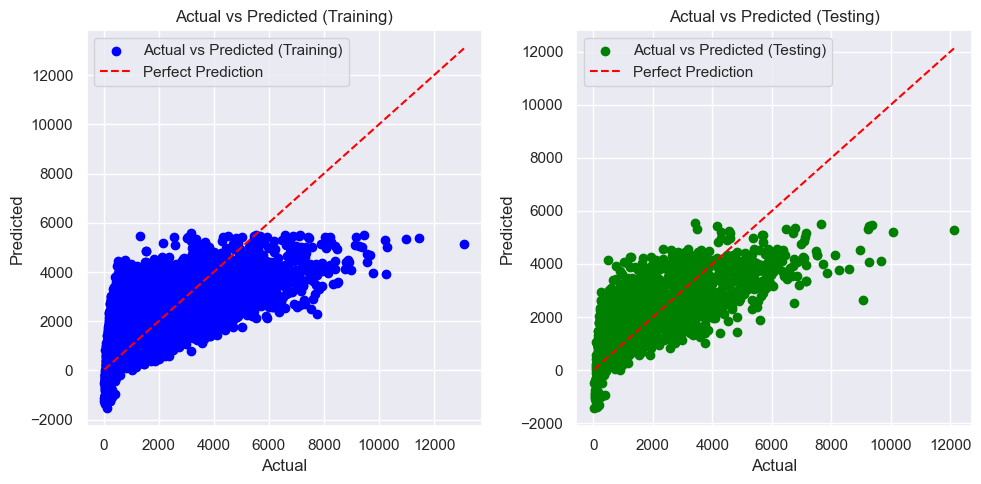

In [57]:
# Make predictions on both training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Plot actual vs predicted values for training data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='blue', label='Actual vs Predicted (Training)')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], '--', color='red', label='Perfect Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Training)')
plt.legend()

# Plot actual vs predicted values for testing data
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='green', label='Actual vs Predicted (Testing)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='Perfect Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Testing)')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

## Decision Tree Model

In [58]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=15,min_samples_leaf=300)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=15, min_samples_leaf=300)

In [59]:
# Predicting the test set results
y_pred = regressor.predict(X_test)
y_pred

array([1470.98907115, 1450.29245912, 1470.98907115, ..., 1014.24959162,
        481.523205  , 2302.4309629 ])

In [60]:
rf_accuracy = round(regressor.score(X_train,y_train),2)
rf_accuracy

0.55

In [61]:
r2_score(y_train, regressor.predict(X_train))

0.5510234263570961

In [62]:

# Cross-validation
cv_scores_dt= cross_val_score(regressor, X, y, cv=5, scoring='neg_root_mean_squared_error')
print(f'Cross-Validation RMSE: {-cv_scores_dt.mean()}')

Cross-Validation RMSE: 1127.7717013639462


In [63]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_grid_search = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42), param_grid=param_grid, cv=5)
dt_grid_search.fit(X_train, y_train)

# Best parameters
print(f"Best Parameters for Decision Tree: {dt_grid_search.best_params_}")

# Evaluate the best model
best_dt_model = dt_grid_search.best_estimator_
best_dt_predictions = best_dt_model.predict(X_test)
best_dt_mse = mean_squared_error(y_test, best_dt_predictions)
best_dt_r2 = r2_score(y_test, best_dt_predictions)

print(f"Optimized Decision Tree - MSE: {best_dt_mse:.2f}, R2: {best_dt_r2:.2f}")


Best Parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Optimized Decision Tree - MSE: 1367740.42, R2: 0.54


## Random Forest Model

In [64]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100,max_depth=6, min_samples_leaf=50,n_jobs=4)
regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=50, n_jobs=4)

In [65]:
# Predicting the test set results
y_pred = regressor.predict(X_test)
y_pred

array([2152.55122455, 1399.65837077,  226.86424085, ..., 1649.72895394,
        345.75574902, 1920.11002244])

In [66]:
rf_accuracy = round(regressor.score(X_train,y_train),2)
rf_accuracy

0.61

In [67]:
r2_score(y_train, regressor.predict(X_train))

0.6117959576629132

In [68]:
# Cross-validation
cv_scores_dt= cross_val_score(regressor, X, y, cv=5, scoring='neg_root_mean_squared_error')
print(f'Cross-Validation RMSE: {-cv_scores_dt.mean()}')

Cross-Validation RMSE: 1081.9394827300644


In [69]:
import pickle
# Define features and target
X = df.drop(['Item_Outlet_Sales'], axis=1)
y = df['Item_Outlet_Sales']

# Define preprocessing for numeric and categorical features
numeric_features = ['Item_Weight', 'Item_Visibility', 'Item_MRP']
categorical_features = [ 'Item_Identifier','Item_Fat_Content', 'Item_Type','Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

# Define the preprocessing for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Handle missing values
    ('scaler', StandardScaler())  # Standard scaling
])

# Define the preprocessing for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encoding
])

# Combine preprocessing for all features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Preprocess features
X_preprocessed = preprocessor.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Save the model and preprocessor
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

with open('preprocessor.pkl', 'wb') as file:
    pickle.dump(preprocessor, file)

print("Model and preprocessor saved successfully.")





Model and preprocessor saved successfully.
